하나의 종목에 대해 재무정보 추출

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<!DOCTYPE html>
<html lang="en" class=" dark">
<head>
<title>ADMA - Adma Biologics Inc Stock Price and Quote</title>
<meta charset="UTF-8"><meta name="viewport" content="width=1024"><meta name="description" content="ADMA - Adma Biologics Inc - Stock screener for investors and traders, financial visualizations.">

            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-700.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-900.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/inter-latin.woff2" as="font" crossorigin>
        
            <script>
                window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
            
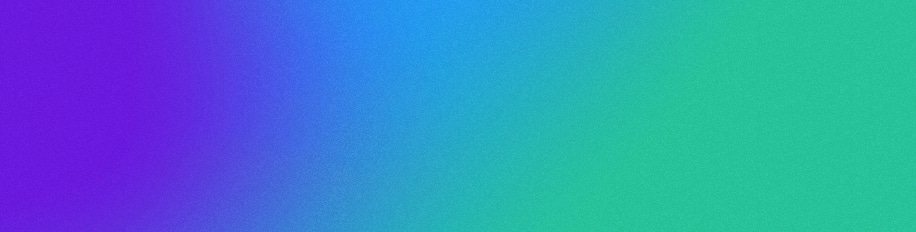

In [8]:
url = 'https://finviz.com/quote.ashx?t=ADMA&p=d'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'Referer': 'https://example.com',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Connection': 'keep-alive'
}

res = requests.get(url, headers=headers)
print(res.text)

In [10]:
soup = BeautifulSoup(res.text, "html.parser")

💡 HTML 문서에서 **표에 해당하는 부분의 class** 찾기. **유일하면 좋음.**  
찾은 클래스 : js-snapshot-table / snapshot-table2 / screener_snapshot-table-body

In [32]:
# 클래스가 유일한지 조사하기
print(f'js-snapshot-table : {len(soup.find_all(class_="js-snapshot-table"))}')
print(f'snapshot-table2 : {len(soup.find_all(class_="snapshot-table2"))}')
print(f'screener_snapshot-table-body : {len(soup.find_all(class_="screener_snapshot-table-body"))}')

js-snapshot-table : 1
snapshot-table2 : 1
screener_snapshot-table-body : 1


세 클래스 다 유일하니 아무거나 사용

In [55]:
# 테이블 찾기
table = soup.find("table",{"class" : "snapshot-table2"})

# 테이블의 모든 행 찾기
rows = table.find_all("tr")

# 데이터 저장
table_data = []

for row in rows:
    cells = row.find_all("td")
    row_data = [cell.get_text(strip=True) for cell in cells]
    table_data.append(row_data)

print(table_data)

[['Index', 'RUT', 'P/E', '77.71', 'EPS (ttm)', '0.28', 'Insider Own', '3.38%', 'Shs Outstand', '236.39M', 'Perf Week', '9.15%'], ['Market Cap', '5.08B', 'Forward P/E', '29.51', 'EPS next Y', '0.73', 'Insider Trans', '-10.69%', 'Shs Float', '228.39M', 'Perf Month', '29.49%'], ['Income', '68.13M', 'PEG', '3.89', 'EPS next Q', '0.15', 'Inst Own', '81.69%', 'Short Float', '6.65%', 'Perf Quarter', '22.06%'], ['Sales', '382.81M', 'P/S', '13.26', 'EPS this Y', '494.23%', 'Inst Trans', '21.60%', 'Short Ratio', '2.92', 'Perf Half Y', '135.93%'], ['Book/sh', '0.98', 'P/B', '21.89', 'EPS next Y', '41.95%', 'ROA', '18.42%', 'Short Interest', '15.20M', 'Perf Year', '474.06%'], ['Cash/sh', '0.37', 'P/C', '58.53', 'EPS next 5Y', '20.00%', 'ROE', '35.55%', '52W Range', '3.60 - 23.64', 'Perf YTD', '375.00%'], ['Dividend Est.', '-', 'P/FCF', '63.93', 'EPS past 5Y', '38.68%', 'ROI', '19.92%', '52W High', '-9.18%', 'Beta', '0.72'], ['Dividend TTM', '-', 'Quick Ratio', '3.26', 'Sales past 5Y', '73.26%', 'G

In [63]:
# 데이터프레임으로 변환
df = pd.DataFrame(table_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,Index,RUT,P/E,77.71,EPS (ttm),0.28,Insider Own,3.38%,Shs Outstand,236.39M,Perf Week,9.15%
1,Market Cap,5.08B,Forward P/E,29.51,EPS next Y,0.73,Insider Trans,-10.69%,Shs Float,228.39M,Perf Month,29.49%
2,Income,68.13M,PEG,3.89,EPS next Q,0.15,Inst Own,81.69%,Short Float,6.65%,Perf Quarter,22.06%
3,Sales,382.81M,P/S,13.26,EPS this Y,494.23%,Inst Trans,21.60%,Short Ratio,2.92,Perf Half Y,135.93%
4,Book/sh,0.98,P/B,21.89,EPS next Y,41.95%,ROA,18.42%,Short Interest,15.20M,Perf Year,474.06%
5,Cash/sh,0.37,P/C,58.53,EPS next 5Y,20.00%,ROE,35.55%,52W Range,3.60 - 23.64,Perf YTD,375.00%
6,Dividend Est.,-,P/FCF,63.93,EPS past 5Y,38.68%,ROI,19.92%,52W High,-9.18%,Beta,0.72
7,Dividend TTM,-,Quick Ratio,3.26,Sales past 5Y,73.26%,Gross Margin,48.79%,52W Low,496.39%,ATR (14),1.15
8,Dividend Ex-Date,-,Current Ratio,7.09,EPS Y/Y TTM,369.01%,Oper. Margin,30.01%,RSI (14),65.57,Volatility,7.28% 4.83%
9,Employees,624,Debt/Eq,0.48,Sales Y/Y TTM,63.39%,Profit Margin,17.80%,Recom,1.00,Target Price,25.00


현재 짝수 열은 인덱스, 홀수 열은 값이므로 짝수 열의 값들은 각 열의 인덱스로, 홀수 열의 값은 짝에 맞는 열의 값으로 채워 넣자.

In [96]:
df = df.reset_index(drop=True)

In [104]:
index_list = []
value_list = []
for i in range(0,12,2):
    index_list.extend(df[i].tolist())
    value_list.extend(df[i+1].tolist())
print(f"index_list : \n{index_list}")
print(f"value_list : \n{value_list}")

index_list : 
['Index', 'Market Cap', 'Income', 'Sales', 'Book/sh', 'Cash/sh', 'Dividend Est.', 'Dividend TTM', 'Dividend Ex-Date', 'Employees', 'Option/Short', 'Sales Surprise', 'SMA20', 'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'P/C', 'P/FCF', 'Quick Ratio', 'Current Ratio', 'Debt/Eq', 'LT Debt/Eq', 'EPS Surprise', 'SMA50', 'EPS (ttm)', 'EPS next Y', 'EPS next Q', 'EPS this Y', 'EPS next Y', 'EPS next 5Y', 'EPS past 5Y', 'Sales past 5Y', 'EPS Y/Y TTM', 'Sales Y/Y TTM', 'EPS Q/Q', 'Sales Q/Q', 'SMA200', 'Insider Own', 'Insider Trans', 'Inst Own', 'Inst Trans', 'ROA', 'ROE', 'ROI', 'Gross Margin', 'Oper. Margin', 'Profit Margin', 'Payout', 'Earnings', 'Trades', 'Shs Outstand', 'Shs Float', 'Short Float', 'Short Ratio', 'Short Interest', '52W Range', '52W High', '52W Low', 'RSI (14)', 'Recom', 'Rel Volume', 'Avg Volume', 'Volume', 'Perf Week', 'Perf Month', 'Perf Quarter', 'Perf Half Y', 'Perf Year', 'Perf YTD', 'Beta', 'ATR (14)', 'Volatility', 'Target Price', 'Prev Close', 'Price', '

In [122]:
df = pd.DataFrame(columns=index_list)
df.loc['ADMA'] = value_list
df

,Index,Market Cap,Income,Sales,Book/sh,Cash/sh,Dividend Est.,Dividend TTM,Dividend Ex-Date,Employees,...,Perf Half Y,Perf Year,Perf YTD,Beta,ATR (14),Volatility,Target Price,Prev Close,Price,Change
ADMA,RUT,5.08B,68.13M,382.81M,0.98,0.37,-,-,-,624,...,135.93%,474.06%,375.00%,0.72,1.15,7.28% 4.83%,25.00,21.78,21.47,-1.42%


In [ ]:
list = [1,2,3,4]
